In [1]:
import numpy as np
import pandas as pd
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier

from scipy import stats 

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib import animation

from IPython.display import display,IFrame,Image,HTML


# Make Data

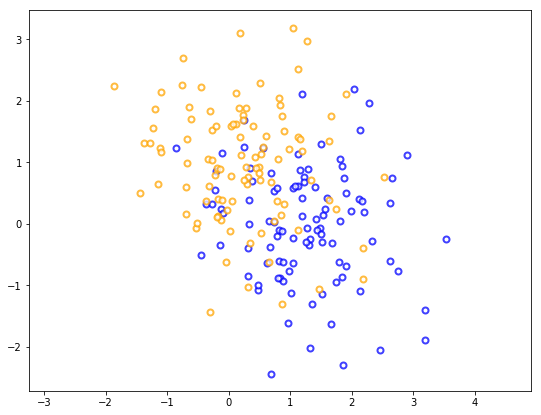

In [2]:
mean = (1, 0)
cov = [[1, 0], [0, 1]]
x1,y1 = stats.multivariate_normal.rvs(mean=mean, cov=cov, size=(1, 100), random_state=1).T

mean = (0, 1)
cov = [[1, 0], [0, 1]]
x2,y2 = stats.multivariate_normal.rvs(mean=mean, cov=cov, size=(1, 100),  random_state=1).T

plt.figure(figsize=(9,7))
plt.plot(x1, y1, 'o', markerfacecolor='white', markeredgecolor='blue', 
         markeredgewidth=2, alpha=0.75)
plt.plot(x2, y2, 'o', markerfacecolor='white', markeredgecolor='orange', 
         markeredgewidth=2, alpha=0.75)
plt.axis('equal')
plt.show()

In [3]:
# x1 y1 are blue  
# x2 y2 are orange
x = np.concatenate([x1.ravel(), x2.ravel()])  
y = np.concatenate([y1.ravel(), y2.ravel()])

# BLUE-0, ORANGE-1
blue = [0,]*len(x1)    # assign 0's to BLUE data
orange = [1,]*len(x2)  # assign 1's to ORANGE data
colors = np.concatenate([blue,orange])

In [4]:
data = pd.DataFrame(np.vstack(zip(x,y,colors)), columns=['x','y','color'])
data.color = data.color.astype(int) # convert back to int after numpy converts to floats

In [5]:
# DATASETS FOR K-NEAREST NEIGHBORS

X = data.loc[:, ['x','y']]
y = data.loc[:, 'color']

__Plot of Meshgird__

In [6]:
def plot_knn_meshgrid(**kwargs):
    # KWARGS ARE POSSIBLE VARIABLES THAT WE ALLOW TO BE CHANGED
    X, y, xcol, ycol, n_neighbors, weights, h = [kwargs[key] for key in kwargs.keys()]
    try:
        plt.clf()
    except:
        pass
    
    # Create color maps
    cmap_bold = ListedColormap(['blue','orange'])
    cmap_light = ListedColormap(['blue','orange'])

    # MAKE KNN MODEL AND FIT DATA.
    knn = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    knn.fit(X,y)

    # xaxis will be first column. yaxis will be second column.
    xmin = X.loc[:, xcol].min()-1
    xmax = X.loc[:, xcol].max()+1
    ymin = X.loc[:, ycol].min()-1
    ymax = X.loc[:, ycol].max()+1


    xx, yy = np.meshgrid(np.arange(xmin, xmax, h),
                         np.arange(ymin, ymax, h))


    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])  # .ravel() is the same as .flatten()

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(9,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light, alpha=0.025)

    # Plot also the training points
    plt.scatter(X.loc[:, xcol],    # xdata
                X.loc[:, ycol],    # ydata
                c=y, 
                cmap=cmap_bold,
                edgecolor='k', 
                s=40, alpha=0.5)

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel('%s'%xcol, fontsize=18)
    plt.ylabel('%s'%ycol, fontsize=18)
    plt.title("2-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))
    plt.show()

__k = 1__

<Figure size 432x288 with 0 Axes>

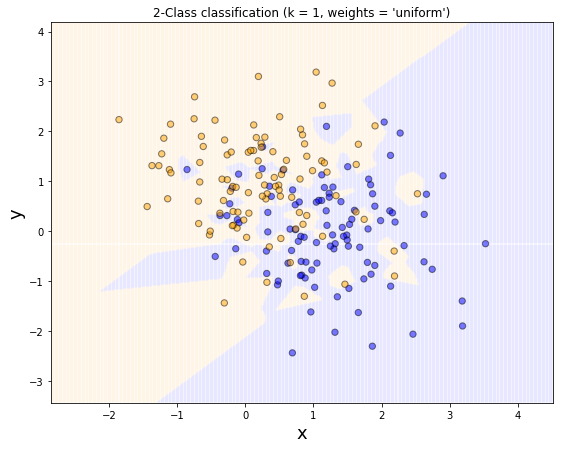

In [7]:
# weight options: 'distance' or 'uniform'
xcol = 'x'
ycol = 'y'


pars = {'X':            data.loc[:, [xcol, ycol]],  
        'y':            data.color, 
        'xcol':         xcol, 
        'ycol':         ycol, 
        'n_neighbors':  1, 
        'weights':      'uniform', #'distance', 
        'h':            0.02}


plot_knn_meshgrid(**pars)

__k = 11__

<Figure size 432x288 with 0 Axes>

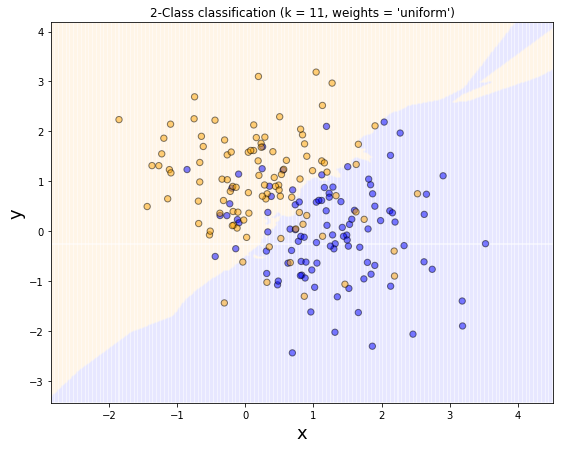

In [8]:
# weight options: 'distance' or 'uniform'
xcol = 'x'
ycol = 'y'


pars = {'X':            data.loc[:, [xcol, ycol]],  
        'y':            data.color, 
        'xcol':         xcol, 
        'ycol':         ycol, 
        'n_neighbors':  11, 
        'weights':      'uniform', #'distance', 
        'h':            0.02}

plot_knn_meshgrid(**pars)

__Write a function that makes this into an Animation and Iterates through different values of k.__

In [10]:

fig, ax = plt.subplots(figsize=(6,6))
plt.close()

def plot_knn_meshgrid(i, X, y):
    ax.clear() 
    n_neighbors = i
    
    xcol     = 'x'
    ycol     = 'y'
    weights  = 'uniform'
    h        = 0.02

    
    cmap_bold  = ListedColormap(['blue','orange'])
    cmap_light = ListedColormap(['blue','orange'])


    knn = neighbors.KNeighborsClassifier(n_neighbors=i, weights=weights)
    knn.fit(X,y)

    # xaxis will be first column. yaxis will be second column.
    xmin = X.loc[:, xcol].min()-1
    xmax = X.loc[:, xcol].max()+1
    ymin = X.loc[:, ycol].min()-1
    ymax = X.loc[:, ycol].max()+1

    xx, yy = np.meshgrid(np.arange(xmin, xmax, h),
                         np.arange(ymin, ymax, h))


    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()]) 
    Z = Z.reshape(xx.shape)

    pcont = ax.pcolormesh(xx, yy, Z, cmap=cmap_light, alpha=0.025)

    # Plot also the training points
    scat = ax.scatter( X.loc[:, xcol],    # xdata
                       X.loc[:, ycol],    # ydata
                       c = y, 
                       cmap = cmap_bold,
                       edgecolor = 'k', 
                       s=40, alpha=0.5)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('%s'%xcol)#, fontsize=18)
    ax.set_ylabel('%s'%ycol)#, fontsize=18)

    text = ax.set_title("2-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))
    
    return pcont, scat, text


ani = animation.FuncAnimation(fig, plot_knn_meshgrid, frames = range(1, 30), 
                              fargs = [data.loc[:, [xcol, ycol]], 
                                       data.color])


ani.save('images/ESL_knn_animation.gif', dpi=180, writer='pillow') # writer='imagemagick')

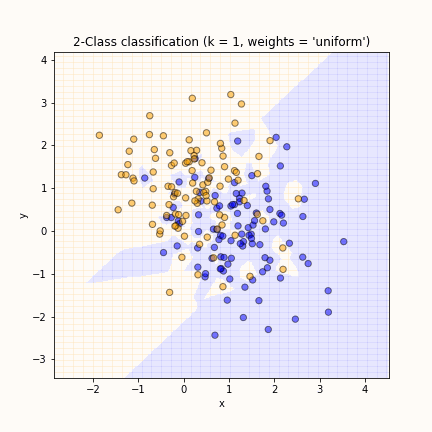

In [11]:
Image(filename='images/ESL_knn_animation.gif', embed=True)